<a href="https://colab.research.google.com/github/Abigail1014/Aboutme/blob/aboutmemain/Introducci%C3%B3n_ML_y_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning y sus aplicaciones

El machine learning (aprendizaje automático en español) es una rama de la inteligencia artificial, que desarrolla métodos que permiten a los ordenadores aprender, mediante algoritmos que convierten los datos en programas computacionales. Se busca que los modelos resultantes sean capaces de generalizar comportamientos para un conjunto más amplio de datos.

Los campos en los cuales se aplica el machine learning incluyen motores de búsqueda, diagnósticos médicos, detección de fraude, análisis de mercados, clasificación de secuencias, reconocimiento del habla y del lenguaje escrito, juegos, robótica, entre otros.

##Aprendizaje supervisado y no supervisado

El aprendizaje supervisado construye algoritmos en los cuales existe una variable de supervisión, que permite que las entradas se transformen de acuerdo al direccionamiento que le dan las categorías de la variable de supervisión, y de tal forma que las salidas resultantes puedan evaluarse comparándolas con los de la variable de supervisión.

En cambio en el aprendizaje no supervisado no hay variable de supervisión y lo que el modelo realiza es buscar patrones sistemáticos en el conjunto de datos, de tal manera que puedan caracterizarse mediante grupos o puntuaciones.

##Librerías de Python para Machine Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#módulos para regresión lineal, regresión Ridge, regresión Lasso y regresión Red elástica
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#módulo para regresión de k vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor
#módulo para regresión con árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#módulo para regresión con máquinas de soporte vectorial
from sklearn.svm import SVR
#módulo para regresión con redes neuronales artificiales
from sklearn.neural_network import MLPRegressor
#módulo para dividir los datos en conjunto de entrenamiento y de prueba, para valadicación cruzada y para búsqueda de
#los mejores hiperparámetros
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#módulo para medir la calidad de las regresiones
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore') #para ignorar las advertencias

##Simulación

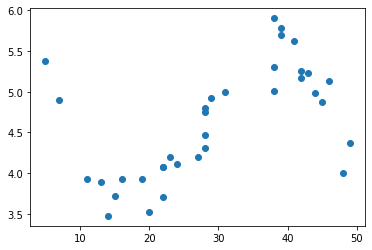

In [ ]:
n=35 #cantidad de observaciones
x=np.random.randint(1,50,(n,1)) #genera una variable independiente aleatoria con valores entre 1 y 50, la dimensión es n por 1
#y=5+3*x+np.random.rand(n,1)*50 #genera la variable dependiente como función lineal de x y con ruido entre 0 y 1 multiplicado por 50
#y=5+3*x-x**2+np.random.rand(n,1)*300 #genera la variable dependiente como función cuadrática de x y con ruido entre 0 y 1 multiplicado por 300
y=np.cos(x/6)+4+np.random.rand(n,1) #genera la variable dependiente como función del coseno de x más un ruido entre 0 y 1
plt.scatter(x,y) #graficar la nube de puntos de x e y
plt.show()

#Regresión lineal

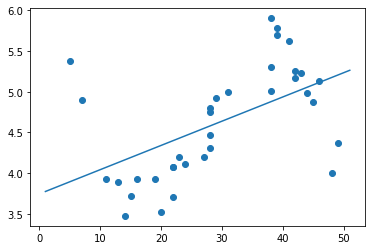

In [ ]:
#genera 200 valores de t como variable independiente del 1 al 50, ordenados e igualmente espaciados
t=np.linspace(1,51,200).reshape(200,1) #redimensionando a 200 por 1
#llama a regresión lineal, ajusta con fit a x e y, y predice usando t
ylin=LinearRegression().fit(x,y).predict(t)
plt.scatter(x,y) #nube de puntos
plt.plot(t,ylin) #grafica una curva
plt.show()

#Regresiones Ridge, Lasso y Red elástica

En el modelo de regresión lineal $Y=X\beta$, una técnica de regularización que es una generalización que incluye a la regresión Ridge y la regresión Lasso, es la regresión Red Elástica (Elastic Net). La cual se trata de minimizar la función de pérdida de la suma de cuadrados de los residuales $\left( Y-X\beta \right) ^{\prime }\left( Y-X\beta \right)$ sujeto a que $\sum_{j=2}^{k}\left\vert \beta _{j}\right\vert=c_1$ y $\sum_{j=2}^{k}\left\vert \beta _{j}\right\vert^{2}=c_2$. La función a optimizar es
\begin{equation*}
L=\left( Y-X\beta \right) ^{\prime }\left( Y-X\beta \right) +\lambda _1\sum_{j=2}^{k}\left\vert \beta _{j}\right\vert+\lambda _2
\sum_{j=2}^{k}\left\vert \beta _{j}\right\vert^{2}
\end{equation*}
donde $\lambda _1=\pi\lambda$, $\lambda _2=\left(1-\pi\right)\lambda$, $\lambda$ es el parámetro de regularización y $\pi$ es el peso que se otorga a la regularización Lasso que varía entre 0 y 1 inclusive. El objetivo es el mismo que en las regresiones Ridge y Lasso, a saber, regularizar los coeficientes para que a un costo de sesgo, sean más eficientes y las predicciones de la variable dependiente sean más precisas.

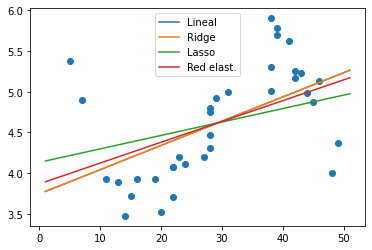

In [ ]:
a=2 #hiperparámetro de regularización (lambda)
l1=0.3 #hiperparámetro de peso para Lasso (pi)
yrd=Ridge(a).fit(x,y).predict(t) #realiza una regresión Ridge con lambda=a, ajusta con x e y, y predice con t
yls=Lasso(a).fit(x,y).predict(t) #realiza una regresión Lasso con lambda=a, ajusta con x e y, y predice con t
yre=ElasticNet(a,l1).fit(x,y).predict(t) #realiza una regresión Red elástica con lambda=a y l1=l1, ajusta con x e y, y predice con t
plt.scatter(x,y)
plt.plot(t,ylin,label='Lineal') #grafica la recta por regresión lineal
plt.plot(t,yrd,label='Ridge') #grafica la recta por regresión Ridge
plt.plot(t,yls,label='Lasso') #grafica la recta por regresión Lasso
plt.plot(t,yre,label='Red elast.') #grafica la recta por regresión Red elástica
plt.legend() #muestra la leyenda
plt.show()

#K vecinos más cercanos

El algoritmo de K vecinos más cercanos es un método que sirve tanto para realizar regresiones como clasificar un conjunto de observaciones. En el caso de la regresión, otorga a una observación el promedio de los K vecinos más cercanos. La medida de cercanía más utilizada es la distancia euclídea:
\begin{equation*}
d_{xy}=\sqrt{\sum_{i=1}^{p}\left( x_{i}-y_{i}\right) ^{2}}
\end{equation*}
donde $x$ y $y$ son puntos en el espacio $p$-dimensional. Otras medidas de distancia también pueden ser empleadas. Para el cálculo se utilizan los vectores de características de las observaciones. Es recomendable que las variables se estandaricen para uniformar las unidades de medidas y así las distancias sean adecuadas.

**Referencias:**

http://www.pythondiario.com/2018/01/introduccion-al-machine-learning-9-k.html

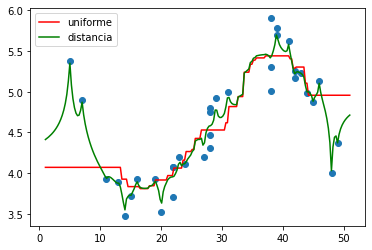

In [ ]:
k=9 #determina los k vecinos más cercanos (KNN)
#llama a la función de KNN, ajusta a x e y, y predice con t
yku=KNeighborsRegressor(k).fit(x,y).predict(t) #uniforme
#llama a la función de KNN con pesos por distancia, ajusta a x e y, y predice con t
ykd=KNeighborsRegressor(k,'distance').fit(x,y).predict(t) #distancias
plt.scatter(x,y)
plt.plot(t,yku,color='red',label='uniforme')
plt.plot(t,ykd,color='green',label='distancia')
plt.legend()
plt.show()

#Árbol de decisión

Es un método que a través de una secuencia de decisiones ordenadas sobre los valores de las características de los datos, da como resultado final la asignación de un valor, generalmente el promedio, a un conjunto de datos que cumplen las condiciones requeridas. Éste método tiene una estructura de árbol que consta de nodos, divisiones y nodos terminales, donde los nodos representan las condiciones que se consideran para clasificar los datos, las divisiones representan los resultados de las condiciones que se hacen y los nodos terminales son los valores promedios finales. Para decidir si un conjunto de datos se debe dividir o no se mide el grado de impureza de tales datos con distintas medidas, entre ellas el error cuadrático medio (MSE).
\begin{equation*}
MSE\left( \widehat{Y}\right)=\frac{\sum_{i=1}^{n}\left( Y_i-\widehat{Y_i} \right) ^{2}}{n}
\end{equation*}


**Referencias:**

https://www.iartificial.net/arboles-de-decision-con-ejemplos-en-python/

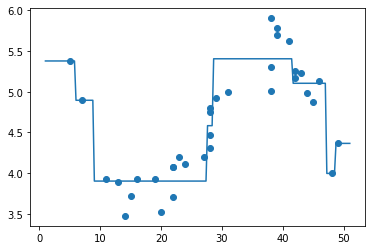

In [ ]:
#llama a la función de árbol de decisión para reg con profundidad 11, ajusta los datos a x e y, y predice con t
ydt=DecisionTreeRegressor(max_depth=3).fit(x,y).predict(t)
plt.scatter(x,y)
plt.plot(t,ydt)
plt.show()

#Support Vector Machine

El método de Support Vector Machine es una técnica para realizar regresiones y clasificaciones. En el caso de regresión se trata de encontrar los coeficientes de la función lineal $f\left( x\right) =\alpha +x^{\prime }\beta$ donde $\alpha$ es una constante y $\beta$ el vector de coeficientes, con una norma cuadrática mínima $\beta ^{\prime }\beta$, sujeto a que los residuales tengan un valor menor a un margen constante $\left\vert y_{i}-f\left( x_{i}\right) \right\vert \leq \varepsilon$. Por supuesto que este requerimiento la mayoría de las veces no será posible, es por eso que se introducen variables de holgura $\xi _{i}$ y $\zeta _{i}$ para cada observación. Entonces la función objetivo será:
\begin{equation*}
L=\frac{1}{2}\beta ^{\prime }\beta +C\sum_{i=1}^{n}\left( \xi _{i}+\zeta
_{i}\right)
\end{equation*}
sujeto a:
\begin{equation*}
y_{i}-f\left( x_{i}\right) \leq \varepsilon +\xi _{i}
\end{equation*}
\begin{equation*}
f\left( x_{i}\right) -y_{i}\leq \varepsilon +\zeta _{i}
\end{equation*}
\begin{equation*}
\xi _{i}\geq 0,\zeta _{i}\geq 0
\end{equation*}
La constante $C$ es positiva y controla la penalidad impuesta a las observaciones que caen fuera del margen $\varepsilon$ y así previene el sobreajuste.

**Referencias:**

https://ligdigonzalez.com/aprendizaje-supervisado-support-vector-regression/

https://la.mathworks.com/help/stats/understanding-support-vector-machine-regression.html?lang=en

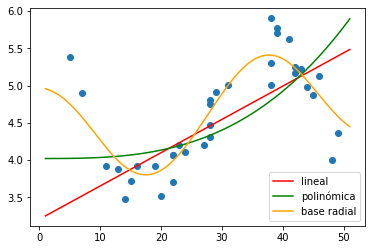

In [ ]:
C=2.0 #valor del hiperparámetro en C
ysvl=SVR('linear',C=C).fit(x,y).predict(t) #predice para el caso lineal
ysvp=SVR('poly',C=C).fit(x,y).predict(t) #predice para el caso polinómico
ysvr=SVR('rbf',C=C).fit(x,y).predict(t) #predice para el caso de función de base radial
plt.scatter(x,y)
plt.plot(t,ysvl,color='red',label='lineal')
plt.plot(t,ysvp,color='green',label='polinómica')
plt.plot(t,ysvr,color='orange',label='base radial')
plt.legend()
plt.show()

#Redes neuronales artificiales

Una red neuronal artificial consiste en un conjunto de unidades, denominadas neuronas artificiales, conectadas entre ellas para transmitirse información. El proceso que lleva a cabo una red neuronal artificial es transformar los datos de entrada mediante la red neuronal sometiéndola a diversas operaciones y produciendo valores de salida que luego son evaluadas.

Las neuronas están agrupadas en capas, una de ellas es de entrada, luego están una o más capas ocultas y posteriormente se halla la capa de salida. En las capas ocultas, una neurona recibe valores a través de sus enlaces con neuronas de la anterior capa inmediata, estos valores son multiplicados por determinados pesos (que en un principio son obtenidos aleatoriamente) y sumados adicionando un sesgo o constante, y luego se les aplica una transformación no lineal mediante una función de activación, el resultado se envía a las neuronas de la capa posterior inmediata.

Entre las funciones de activación se tiene a la función sigmoide:
\begin{eqnarray*}
f\left( x\right)=\frac{1}{1+e^{-x}}
\end{eqnarray*}
La función tangente hiperbólica:
\begin{eqnarray*}
f\left( x\right)=\frac{1-e^{-x}}{1+e^{-x}}
\end{eqnarray*}
y la función rectificadora (relu)
\begin{eqnarray*}
f\left( x\right)  &=&\max \left( 0,x\right)
\end{eqnarray*}
Cuando los valores transformados llegan a la capa de salida, se evalúa su cercanía o similitud con datos de supervisión reales. Éstos determinarán que tan adecuado es el ajuste, y si el error es muy grande se corrige propagando tales errores hacia atrás para reajustar los valores de los coeficientes y el sesgo. Se realiza éste procedimiento en varias iteraciones hasta que un criterio de convergencia o un máximo de iteraciones se haya cumplido. El objetivo es minimizar los errores de aproximación a los datos de la variable de supervisión.

**Referencias:**

https://medium.com/@jcrispis56/una-introducci%C3%B3n-completa-a-redes-neuronales-con-python-y-tensorflow-2-0-b7f20bcfebc5
https://www.researchgate.net/figure/Figura-2-Red-Neuronal-Back-propagation_fig2_279640045

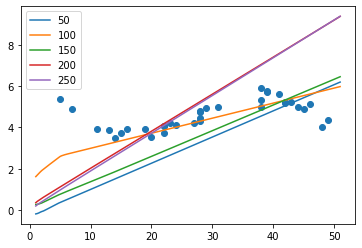

In [ ]:
plt.scatter(x,y)
for i in np.arange(50,300,50): #i va a variar de 50 a 300 en pasos de 50, es decir 50 100 150 200 250 neuronas
  yann=MLPRegressor(i).fit(x,y).predict(t) #llama a la función con i neuronas, ajusta, y predice
  plt.plot(t,yann,label=i)
plt.legend()
plt.show()

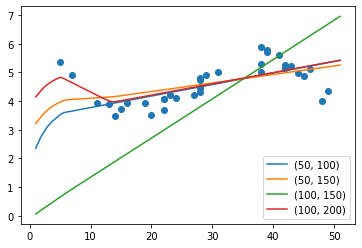

In [ ]:
#lista de pares de capas ocultas con sus cantidades de neuronas respectivas
tuplas=[(50,100), (50,150), (100,150), (100,200)]
plt.scatter(x,y)
for i in tuplas:
  yann=MLPRegressor(i).fit(x,y).predict(t)
  plt.plot(t,yann,label=i)
plt.legend()
plt.show()

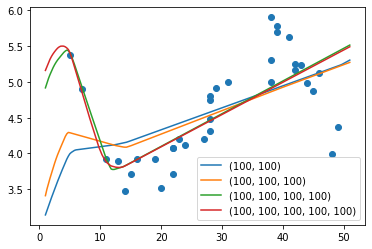

In [ ]:
#lista de tuplas con elementos que se repiten i veces
tuplas=[tuple(np.repeat(100,i)) for i in range(2,6)]
plt.scatter(x,y)
for i in tuplas:
  yann=MLPRegressor(i).fit(x,y).predict(t)
  plt.plot(t,yann,label=i)
plt.legend()
plt.show()

# Selección de hiperparámetros

##Red elástica

Score: 0.15433722954107493 Hiperparámetros: {'alpha': 10.0, 'l1_ratio': 0.0}


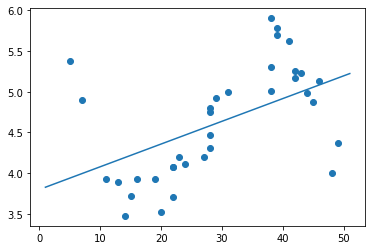

In [ ]:
#conjunto de hiperparámetros para buscar los mejores dentro de ellos
hiperls = {'alpha': np.arange(0,10.1,0.1), 'l1_ratio': np.arange(0,1.1,0.1)}
#busca los mejores hiperparámetros del conjunto anterior en el modelo ElasticNet, y ajusta los datos al modelo
gscv_ls = GridSearchCV(ElasticNet(), hiperls).fit(x,y) #por validación cruzada cv=5
#imprime el score del mejor modelo y los hiperparámetros de ese modelo
print('Score:', gscv_ls.best_score_, 'Hiperparámetros:', gscv_ls.best_params_)
#realiza la predicción
yp=gscv_ls.predict(t)
plt.scatter(x,y)
plt.plot(t,yp)
plt.show()

##K vecinos más cercanos

Score: 0.7494472062771715 Hiperparámetros: {'n_neighbors': 3, 'weights': 'distance'}


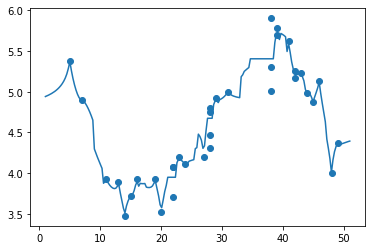

In [ ]:
#conjunto de hiperparámetros de vecinos y tipo de promedio (uniforme o ponderado por la distancia)
hiperknn = {'n_neighbors': np.arange(2,21), 'weights': ['uniform','distance']}
gscv_knn = GridSearchCV(KNeighborsRegressor(), hiperknn).fit(x,y)
print('Score:', gscv_knn.best_score_, 'Hiperparámetros:', gscv_knn.best_params_)
yp=gscv_knn.predict(t)
plt.scatter(x,y)
plt.plot(t,yp)
plt.show()

##Árbol de decisión

Score: 0.7171195939158265 Hiperparámetros: {'max_depth': 6, 'min_samples_leaf': 1}


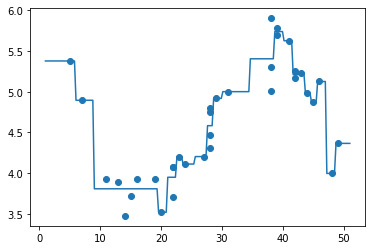

In [ ]:
#hiperparámetros son máxima profundidad y número mínimo de observaciones en los nodos terminales
hiperdt = {'max_depth': np.arange(2,21), 'min_samples_leaf': np.arange(1,11)}
gscv_dt = GridSearchCV(DecisionTreeRegressor(), hiperdt).fit(x,y)
print('Score:', gscv_dt.best_score_, 'Hiperparámetros:', gscv_dt.best_params_)
yp=gscv_dt.predict(t)
plt.scatter(x,y)
plt.plot(t,yp)
plt.show()

##Support vector machine

Score: 0.8038838304972693 Hiperparámetros: {'C': 3.5, 'kernel': 'rbf'}


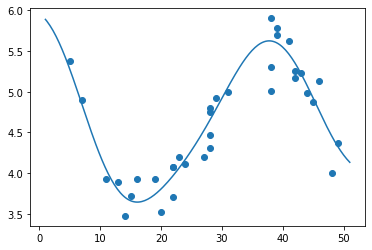

In [ ]:
hipersv = {'kernel': ['linear','poly','rbf'], 'C': np.arange(1.0,10.5,0.5)}
gscv_svm=GridSearchCV(SVR(),hipersv).fit(x,y)
print('Score:', gscv_svm.best_score_, 'Hiperparámetros:', gscv_svm.best_params_)
yp=gscv_svm.predict(t)
plt.scatter(x,y)
plt.plot(t,yp)
plt.show()

##Redes neuronales artificiales

In [ ]:
tuplas=[] #definiendo una lista vacía
for i in range(100,300,100):
  for j in range(200,400,100):
    for k in range(100,200,50):
      tuplas.append((i,j,k)) #adicionando elementos a la lista

Score: 0.3881506607314872 Hiperparámetros: {'hidden_layer_sizes': (100, 300, 150)}


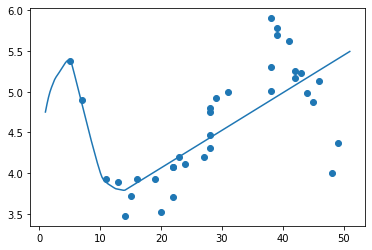

In [ ]:
hipermlp = {'hidden_layer_sizes': tuplas}
gscv_ann=GridSearchCV(MLPRegressor(),hipermlp).fit(x,y)
print('Score:', gscv_ann.best_score_, 'Hiperparámetros:', gscv_ann.best_params_)
yp=gscv_ann.predict(t)
plt.scatter(x,y)
plt.plot(t,yp)
plt.show()

#Evaluación

In [ ]:
#Lista de los mejores modelos hallados con Gridsearch
modelos = [gscv_ls.best_estimator_, gscv_knn.best_estimator_, gscv_dt.best_estimator_, gscv_svm.best_estimator_, gscv_ann.best_estimator_]
#Lista de nombres de los modelos
nombres = ['Regresión lineal RE', 'K vecinos más cercanos', 'Árbol de decisión', 'Support vector machine', 'Redes neuronales']
xen, xpr, yen, ypr = train_test_split(x,y) #dividiendo los datos en conjuntos de entrenamiento y prueba

In [ ]:
for mod, nom in zip(modelos, nombres):
  yp = mod.fit(xen,yen).predict(xpr) #ajusta cada modelo mod con los datos de entrenamiento y predice con los datos de prueba
  print(nom, 'MSE', mean_squared_error(ypr, yp), 'MAE', mean_absolute_error(ypr, yp),
        'EV', explained_variance_score(ypr, yp), 'R2', r2_score(ypr, yp))
  #MSE Error cuadrático medio, MAE Error absoluto medio, EV Varianza explicada, R2 coeficiente de determinación

Regresión lineal RE MSE 0.5978139201402344 MAE 0.6467525062415289 EV 0.29224274754237645 R2 0.02161788860841618
K vecinos más cercanos MSE 0.13120726460187915 MAE 0.26259694163952696 EV 0.8030227874330913 R2 0.7852662237423517
Árbol de decisión MSE 0.06273810367779738 MAE 0.20242144104722185 EV 0.9010280346807478 R2 0.897322835295323
Support vector machine MSE 0.05262027977853742 MAE 0.20125590049907624 EV 0.9139287848777742 R2 0.9138816633449007
Redes neuronales MSE 0.3096241844399852 MAE 0.4901902610400004 EV 0.6072699329986824 R2 0.493269137595142


In [ ]:
for mod, nom in zip(modelos, nombres):
  cvm=cross_val_score(mod,x,y)
  print(nom, np.mean(cvm))

Regresión lineal RE 0.15433722954107493
K vecinos más cercanos 0.7494472062771715
Árbol de decisión 0.7171195939158265
Support vector machine 0.8038838304972693
Redes neuronales 0.25153518736622105
